This notebook shows, how to compute RandomForest's accuracy scores for each value of `n_estimators` without retraining the model. No rocket science involved, but still useful.

# Load some data

In [1]:
import sklearn.datasets
from sklearn.model_selection import train_test_split

X, y = sklearn.datasets.load_digits(10, True) # 8x8 imags
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [8]:
X.shape

(1797, 64)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Step 1:** first fit a Random Forest to the data. Set `n_estimators` to a high value.

In [9]:
rf = RandomForestClassifier(n_estimators=500, max_depth=4, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Step 2:** Get predictions for each tree in Random Forest separately.

In [17]:
predictions = []
for tree in rf.estimators_:
    #print(tree.predict_proba(X_val))
    #print("Then indexed")
    #print(tree.predict_proba(X_val)[None,:])

    predictions.append(tree.predict_proba(X_val)[None, :])  # adds one axis to the front

**Step 3:** Concatenate the predictions to a tensor of size `(number of trees, number of objects, number of classes)`.

In [13]:
predictions

[array([[[ 0.        ,  0.05833333,  0.09166667, ...,  0.025     ,
           0.05833333,  0.21666667],
         [ 0.        ,  0.05714286,  0.56      , ...,  0.        ,
           0.16      ,  0.06857143],
         [ 0.09677419,  0.2311828 ,  0.00537634, ...,  0.18817204,
           0.22580645,  0.05376344],
         ..., 
         [ 0.        ,  0.05714286,  0.56      , ...,  0.        ,
           0.16      ,  0.06857143],
         [ 0.        ,  0.05714286,  0.56      , ...,  0.        ,
           0.16      ,  0.06857143],
         [ 0.97413793,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]]]),
 array([[[ 0.        ,  0.77777778,  0.16666667, ...,  0.        ,
           0.05555556,  0.        ],
         [ 0.        ,  0.02439024,  0.82113821, ...,  0.        ,
           0.02439024,  0.04878049],
         [ 0.        ,  0.36893204,  0.02912621, ...,  0.0776699 ,
           0.33009709,  0.11650485],
         ..., 
         [ 0.        ,  0.06451

In [18]:
predictions = np.vstack(predictions) # stacks vertically, row-wise
predictions

array([[[ 0.        ,  0.05833333,  0.09166667, ...,  0.025     ,
          0.05833333,  0.21666667],
        [ 0.        ,  0.05714286,  0.56      , ...,  0.        ,
          0.16      ,  0.06857143],
        [ 0.09677419,  0.2311828 ,  0.00537634, ...,  0.18817204,
          0.22580645,  0.05376344],
        ..., 
        [ 0.        ,  0.05714286,  0.56      , ...,  0.        ,
          0.16      ,  0.06857143],
        [ 0.        ,  0.05714286,  0.56      , ...,  0.        ,
          0.16      ,  0.06857143],
        [ 0.97413793,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.77777778,  0.16666667, ...,  0.        ,
          0.05555556,  0.        ],
        [ 0.        ,  0.02439024,  0.82113821, ...,  0.        ,
          0.02439024,  0.04878049],
        [ 0.        ,  0.36893204,  0.02912621, ...,  0.0776699 ,
          0.33009709,  0.11650485],
        ..., 
        [ 0.        ,  0.06451613,  0.12903226, ...,

**Step 4:** Сompute cumulative average of the predictions. That will be a tensor, that will contain predictions of the random forests for each `n_estimators`.

In [19]:
cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]  # add axes

cum_mean

array([[[ 0.        ,  0.05833333,  0.09166667, ...,  0.025     ,
          0.05833333,  0.21666667],
        [ 0.        ,  0.05714286,  0.56      , ...,  0.        ,
          0.16      ,  0.06857143],
        [ 0.09677419,  0.2311828 ,  0.00537634, ...,  0.18817204,
          0.22580645,  0.05376344],
        ..., 
        [ 0.        ,  0.05714286,  0.56      , ...,  0.        ,
          0.16      ,  0.06857143],
        [ 0.        ,  0.05714286,  0.56      , ...,  0.        ,
          0.16      ,  0.06857143],
        [ 0.97413793,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.41805556,  0.12916667, ...,  0.0125    ,
          0.05694444,  0.10833333],
        [ 0.        ,  0.04076655,  0.69056911, ...,  0.        ,
          0.09219512,  0.05867596],
        [ 0.0483871 ,  0.30005742,  0.01725128, ...,  0.13292097,
          0.27795177,  0.08513415],
        ..., 
        [ 0.        ,  0.06082949,  0.34451613, ...,

**Step 5:** Get accuracy scores for each `n_estimators` value

In [20]:
scores = []
for pred in cum_mean:
    scores.append(accuracy_score(y_val, np.argmax(pred, axis=1)))

**That is it!** Plot the resulting scores to obtain similar plot to one that appeared on the slides.

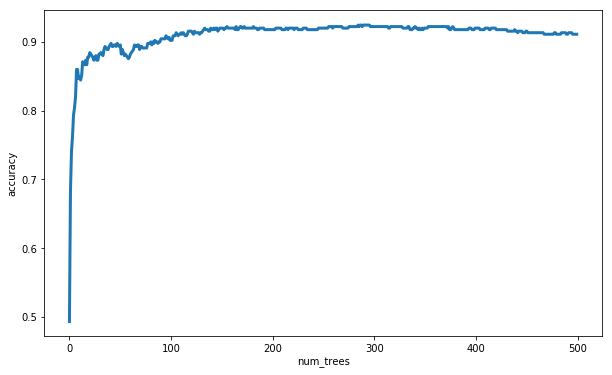

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(scores, linewidth=3)
plt.xlabel('num_trees')
plt.ylabel('accuracy');

We see, that 150 trees are already sufficient to have stable result.